In [320]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
def epsilon_to_num_samples(num_consumers, num_goods, epsilon, delta, c, excluded_pairs):
    ser = np.ceil(np.log((2.0 * num_consumers * num_goods - len(excluded_pairs)) / delta) * 0.5 * (c / epsilon) * (c / epsilon))
    ser = ser.astype('int64')
    return ser

def num_samples_to_epsilon(num_consumers, num_goods, num_samples, delta, c, excluded_pairs):
    return c * np.sqrt(np.log((2.0 * num_consumers * num_goods - len(excluded_pairs)) / delta) / (2.0 * num_samples))


def add_ea_num_samples(data, eps_col_name):
    data['ea_num_samples'] = epsilon_to_num_samples(data['num_consumers'], 
                                             data['num_goods'], 
                                             data[eps_col_name], 
                                             0.1, 
                                             data['noise_factor'] + 10.0, 
                                             set())
def add_ea_eps(data):
    data['ea_eps'] = num_samples_to_epsilon(data['num_consumers'], 
                                             data['num_goods'], 
                                             data['ea_num_samples'], 
                                             0.1, 
                                             data['noise_factor'] + 10.0, 
                                             set())

In [322]:
results_dir = '../results/'
all_data = pd.concat([pd.read_csv(f'{results_dir}results_ea_{source}.csv') for source in ['enrique', 'karina', 'grid']])
data = all_data
add_ea_num_samples(data, 'eps')
add_ea_eps(data)

data

,num_consumers,num_goods,type_market,noise_factor,eps,gt_welfare,emp_welfare,max_regret_low_prices_first,max_regret_high_prices_first,max_regret_low_prices_second,max_regret_high_prices_second,ea_num_samples,ea_eps
0,5,5,uniform_random_distribution,1.0,0.20,36.219033,36.218879,0.000609,0.000000,0.002939,0.002939,9400,0.199996
1,5,5,uniform_random_distribution,1.0,0.20,39.316575,39.323386,0.000000,0.000000,0.002187,0.005160,9400,0.199996
2,5,5,uniform_random_distribution,1.0,0.20,43.380774,43.366287,0.008415,0.000849,0.000000,0.002320,9400,0.199996
3,5,5,uniform_random_distribution,1.0,0.20,37.128158,37.124748,0.004633,0.000168,0.000000,0.003079,9400,0.199996
4,5,5,uniform_random_distribution,1.0,0.20,34.379169,34.379121,0.000000,0.000782,0.004462,0.002100,9400,0.199996
5,5,5,uniform_random_distribution,1.0,0.20,35.233649,35.229736,0.006019,0.006019,0.000000,0.004378,9400,0.199996
6,5,5,uniform_random_distribution,1.0,0.20,33.859669,33.862109,0.000000,0.002605,0.005824,0.003571,9400,0.199996
7,5,5,uniform_random_distribution,1.0,0.20,40.673983,40.678983,0.000000,0.002682,0.001604,0.006644,9400,0.199996
8,5,5,uniform_random_distribution,1.0,0.20,36.303212,36.303930,0.005731,0.005731,0.001328,0.000414,9400,0.199996
9,5,5,uniform_random_distribution,1.0,0.20,34.017088,34.023574,0.000000,0.002031,0.001559,0.001376,9400,0.199996


In [323]:
type_of_markets = ['uniform_random_distribution',
                   'preferred_good_distribution',
                   'preferred_distinct_good_distribution',
                   'preferred_subset_distribution']

market = 'preferred_subset_distribution'

uniform = data[(data['type_market'] == market) & 
               (data['num_consumers'] == 20) &
               (data['num_goods'] == 20) &
               (data['noise_factor'] == 1.0)]
uniform['eps_guarantee'] = 2.0 * uniform['ea_eps']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


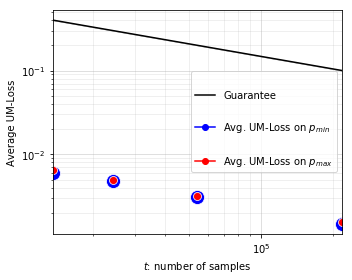

In [324]:
plt.figure(figsize=(5, 4))

ax = sns.lineplot(x='ea_num_samples', 
                  y='eps_guarantee', 
                  style='type_market',
                  palette={market : 'black'},
                  data = uniform,
                 hue ='type_market')
colors = ['blue', 'red']
sizes = [14, 8]
for i, metric in enumerate([
    'max_regret_low_prices_first', 
    'max_regret_high_prices_first'
                           ]):
    ax = sns.lineplot(x='ea_num_samples', 
                      y=metric, 
                      hue='type_market',
                      style='type_market',
                      palette={market : colors[i]},
                      data = uniform,
                      ci=None,
                      markers=True,
                      markersize=sizes[i],
                      linewidth=0.0,
                     )
ax.set_xlabel(r'$t$: number of samples')
ax.set_ylabel(r'Average UM-Loss')
ax.set_xlim(min(uniform['ea_num_samples'].unique()), max(uniform['ea_num_samples'].unique()))
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True, which='major', ls='-', alpha=0.5)
ax.grid(True, which='minor', ls='-', alpha=0.25)
# Set only one legend for the entire plot
#ax.get_legend().remove()
#handles, labels = ax.get_legend_handles_labels()
#L = plt.figlegend(handles=handles, labels=labels, bbox_to_anchor=(0.99, 0.95), loc='upper right', bbox_transform=plt.gcf().transFigure)

legend = ax.legend()
legend.texts[0].set_text("")
legend.texts[1].set_text("Guarantee")
legend.texts[2].set_text("")
legend.texts[3].set_text(r"Avg. UM-Loss on $p_{min}$")
legend.texts[4].set_text("")
legend.texts[5].set_text(r"Avg. UM-Loss on $p_{max}$")

plt.tight_layout()
plt.savefig(f'/Users/enriqueareyan/Documents/workspace/noisyce/plots/ea.png', figsize=(1, 1), dpi=150)


In [325]:
all_data

,num_consumers,num_goods,type_market,noise_factor,eps,gt_welfare,emp_welfare,max_regret_low_prices_first,max_regret_high_prices_first,max_regret_low_prices_second,max_regret_high_prices_second,ea_num_samples,ea_eps
0,5,5,uniform_random_distribution,1.0,0.20,36.219033,36.218879,0.000609,0.000000,0.002939,0.002939,9400,0.199996
1,5,5,uniform_random_distribution,1.0,0.20,39.316575,39.323386,0.000000,0.000000,0.002187,0.005160,9400,0.199996
2,5,5,uniform_random_distribution,1.0,0.20,43.380774,43.366287,0.008415,0.000849,0.000000,0.002320,9400,0.199996
3,5,5,uniform_random_distribution,1.0,0.20,37.128158,37.124748,0.004633,0.000168,0.000000,0.003079,9400,0.199996
4,5,5,uniform_random_distribution,1.0,0.20,34.379169,34.379121,0.000000,0.000782,0.004462,0.002100,9400,0.199996
5,5,5,uniform_random_distribution,1.0,0.20,35.233649,35.229736,0.006019,0.006019,0.000000,0.004378,9400,0.199996
6,5,5,uniform_random_distribution,1.0,0.20,33.859669,33.862109,0.000000,0.002605,0.005824,0.003571,9400,0.199996
7,5,5,uniform_random_distribution,1.0,0.20,40.673983,40.678983,0.000000,0.002682,0.001604,0.006644,9400,0.199996
8,5,5,uniform_random_distribution,1.0,0.20,36.303212,36.303930,0.005731,0.005731,0.001328,0.000414,9400,0.199996
9,5,5,uniform_random_distribution,1.0,0.20,34.017088,34.023574,0.000000,0.002031,0.001559,0.001376,9400,0.199996


In [326]:
grouped = all_data.groupby(by=['type_market','eps']).mean().reset_index()
grouped[['type_market', 
         'eps', 
         'max_regret_low_prices_first',
         'max_regret_high_prices_first']]

,type_market,eps,max_regret_low_prices_first,max_regret_high_prices_first
0,preferred_distinct_good_distribution,0.05,0.000009,0.002062
1,preferred_distinct_good_distribution,0.10,0.000014,0.004317
2,preferred_distinct_good_distribution,0.15,0.000038,0.006406
3,preferred_distinct_good_distribution,0.20,0.000015,0.008654
4,preferred_good_distribution,0.05,0.001927,0.002319
5,preferred_good_distribution,0.10,0.003912,0.004637
6,preferred_good_distribution,0.15,0.005879,0.007158
7,preferred_good_distribution,0.20,0.008000,0.009426
8,preferred_subset_distribution,0.05,0.001943,0.002205
9,preferred_subset_distribution,0.10,0.003807,0.004355


In [327]:
market_name = {'uniform_random_distribution' : 'Uniform',
               'preferred_good_distribution': 'Preferred-Good',
               'preferred_distinct_good_distribution': 'Preferred-Good-Distinct',
               'preferred_subset_distribution': 'Preferred-Subset'}
x = []
for m in ['uniform_random_distribution', 
          'preferred_good_distribution', 
          'preferred_distinct_good_distribution',
          'preferred_subset_distribution']:
    r = [market_name[m]]
    for eps in [0.05, 0.2]:
        d = all_data[(all_data['type_market'] == m) & (all_data['eps'] == eps)].mean()
        r += d['max_regret_low_prices_second'], d['max_regret_high_prices_second']
    x += [r]

In [328]:
res = pd.DataFrame(x, columns=['Distribution', 'p_min','p_max','p_min','p_max'])#,'p_min','p_max','p_min','p_max'])

In [329]:
print(res.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
            Distribution &     p\_min &     p\_max &     p\_min &     p\_max \\
\midrule
                 Uniform &  0.001862 &  0.002061 &  0.007410 &  0.008127 \\
          Preferred-Good &  0.001902 &  0.002150 &  0.007624 &  0.008575 \\
 Preferred-Good-Distinct &  0.000002 &  0.002126 &  0.000017 &  0.008267 \\
        Preferred-Subset &  0.001825 &  0.001970 &  0.007269 &  0.007933 \\
\bottomrule
\end{tabular}

